# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
'''
CELL 1
'''

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train_orig, y_train_orig = train['features'], train['labels']
x_test_orig, y_test_orig = test['features'], test['labels']


print("x_train shape:", x_train_orig.shape)
print("y_train shape:", y_train_orig.shape)
print("x_test shape:", x_test_orig.shape)
print("y_test shape:", y_test_orig.shape)

x_train shape: (39209, 32, 32, 3)
y_train shape: (39209,)
x_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
'''
CELL 2
'''

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = x_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = x_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (x_train_orig.shape[1],x_train_orig.shape[2],x_train_orig.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train_orig).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

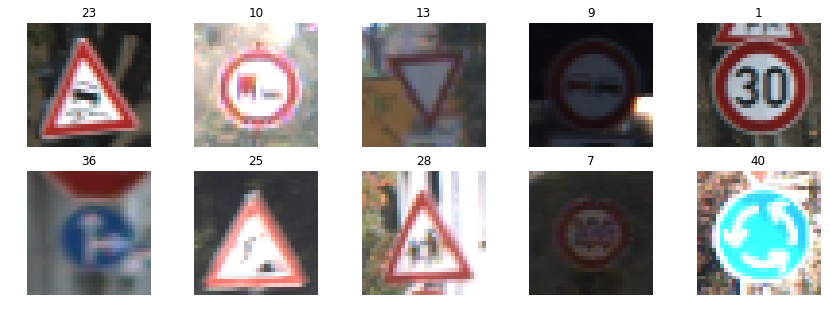

In [15]:
'''
CELL 3
'''

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd

%matplotlib inline

# show 10 random images 
fig, axis = plt.subplots(2,5, figsize=(15, 5))
fig.subplots_adjust(hspace = .2, wspace=.001)
axis = axis.ravel()
for i in range(10):
    index = random.randint(0, len(x_train_orig))
    image = x_train_orig[index]
    axis[i].axis('off')
    axis[i].imshow(image)
    axis[i].set_title(y_train_orig[index])

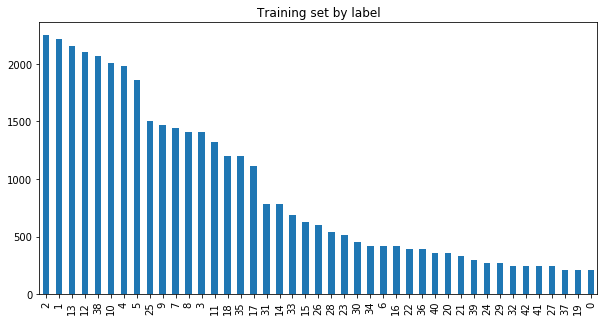

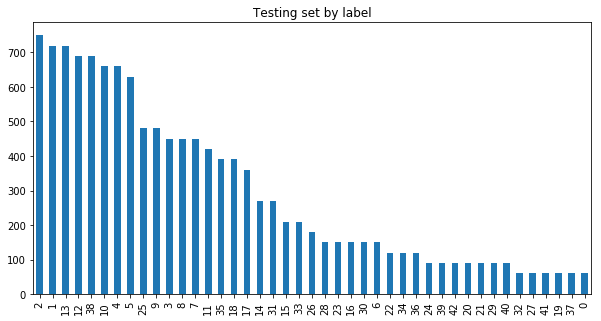

In [16]:
'''
CELL 4
'''

def label_histogram(data, title):
    """
    Plots a histogram of label counts
    """
    fig = plt.figure()
    fig.set_size_inches(w=10,h=5)
    pd.value_counts(data).plot(kind="bar",title=title)

label_histogram(y_train_orig, "Training set by label")
label_histogram(y_test_orig, "Testing set by label")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
'''
CELL 5
'''

### Preprocessing

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


def normalize(data):
    return (data.astype('float32') / 255.) - 0.5 

def label_binarizer(labels):
    lb = preprocessing.LabelBinarizer()
    lb.fit(labels)
    return lb

def preprocess(x_train, y_train, x_test, y_test):
    # Normalize Data
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    # One hot encoding of labels
    lb = label_binarizer(y_train)
    y_train = lb.transform(y_train)
    y_test = lb.transform(y_test)
    # Split training set into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, stratify = y_train ) 
    return x_train, x_val, x_test, y_train, y_val, y_test

print("Before preprocessing shape")
print(x_train_orig.shape, x_test_orig.shape)
x_train, x_val, x_test, y_train, y_val, y_test = preprocess(x_train_orig, y_train_orig, x_test_orig, y_test_orig)
print("After preprocessing shape")
print(x_train.shape, x_val.shape, x_test.shape)

Before preprocessing shape
(39209, 32, 32, 3) (12630, 32, 32, 3)
After preprocessing shape
(26270, 32, 32, 3) (12939, 32, 32, 3) (12630, 32, 32, 3)


### Model Architecture

In [18]:
'''
CELL 6
'''

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x_data):
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation 1.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation 2
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal([400, 120], stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    # Activation 3 
    fc2 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_w = tf.Variable(tf.truncated_normal([120, n_classes], stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    fc3 = tf.matmul(fc2, fc3_w) + fc3_b
    
    # Activation 4 
    fc3 = tf.nn.relu(fc2)  
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc4_w = tf.Variable(tf.truncated_normal([120, n_classes], stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(n_classes))
    fc4 = tf.matmul(fc3, fc4_w) + fc4_b

    return fc4

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [20]:
'''
CELL 7
'''

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None, n_classes))
keep_prob = tf.placeholder(tf.float32)

fc = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc, y))
opt = tf.train.AdamOptimizer(learning_rate=0.001) 
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def next_batch(x_data, y_data, batch_size, step):
    batch_start = step*batch_size
    batch_x = x_data[batch_start:batch_start + batch_size]
    batch_y = y_data[batch_start:batch_start + batch_size]
    return batch_x, batch_y

def eval_data(x_data, y_data):
    steps_per_epoch = len(x_data) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = next_batch(x_data, y_data, BATCH_SIZE, step)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples


EPOCHS = 20
BATCH_SIZE = 128
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    steps_per_epoch = len(x_train) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train the model
    for i in range(EPOCHS):
        for step in range(steps_per_epoch):
            batch_x, batch_y = next_batch(x_train, y_train, BATCH_SIZE, step)
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        val_loss, val_acc = eval_data(x_val, y_val)
        print("EPOCH {} ...".format(i+1)+" ... "+ "Validation loss = {:.3f}".format(val_loss) +" ... " +"Validation accuracy = {:.3f}".format(val_acc))
        print()

    saver.save(sess, './chaiNet')
    test_loss, test_acc = eval_data(x_test, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))


EPOCH 1 ... ... Validation loss = 0.838 ... Validation accuracy = 0.775

EPOCH 2 ... ... Validation loss = 0.424 ... Validation accuracy = 0.891

EPOCH 3 ... ... Validation loss = 0.291 ... Validation accuracy = 0.924

EPOCH 4 ... ... Validation loss = 0.213 ... Validation accuracy = 0.947

EPOCH 5 ... ... Validation loss = 0.173 ... Validation accuracy = 0.958

EPOCH 6 ... ... Validation loss = 0.143 ... Validation accuracy = 0.966

EPOCH 7 ... ... Validation loss = 0.130 ... Validation accuracy = 0.969

EPOCH 8 ... ... Validation loss = 0.120 ... Validation accuracy = 0.972

EPOCH 9 ... ... Validation loss = 0.115 ... Validation accuracy = 0.972

EPOCH 10 ... ... Validation loss = 0.107 ... Validation accuracy = 0.976

EPOCH 11 ... ... Validation loss = 0.098 ... Validation accuracy = 0.979

EPOCH 12 ... ... Validation loss = 0.109 ... Validation accuracy = 0.976

EPOCH 13 ... ... Validation loss = 0.117 ... Validation accuracy = 0.975

EPOCH 14 ... ... Validation loss = 0.112 ... Va

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']
(32, 32, 3)


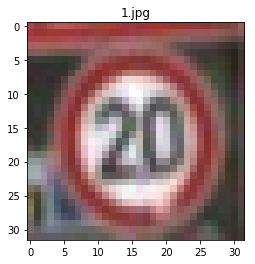

(32, 32, 3)


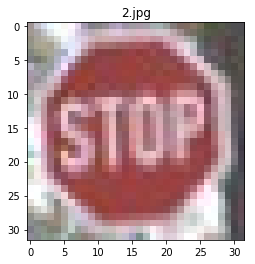

(32, 32, 3)


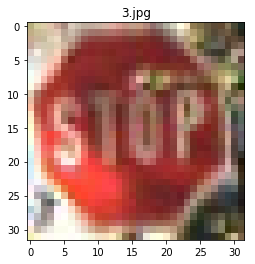

(32, 32, 3)


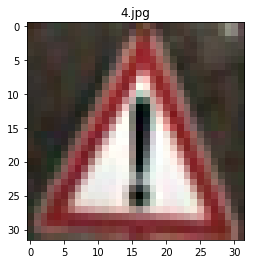

(32, 32, 3)


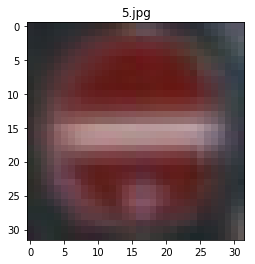

(32, 32, 3)


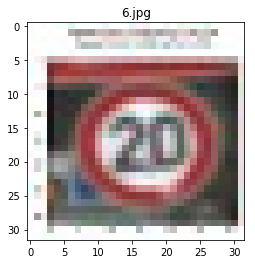

In [23]:
'''
CELL 8
'''

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

#Load images
dir = "extra-traffic-signs/"
files = [file for file in os.listdir(dir) if file.endswith('.jpg')]
print(files)
extra_signs_x = np.empty((0,32,32,3))

#Display Images
for image_path in files :
    image = mpimg.imread(dir + image_path)
    print(image.shape)
    extra_signs_x = np.append(extra_signs_x, np.array([image]), axis=0)
    plt.title(image_path)
    plt.imshow(image)
    plt.show()


### Predict the Sign Type for Each Image

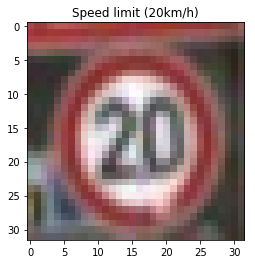

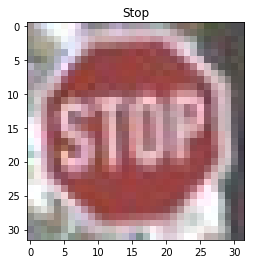

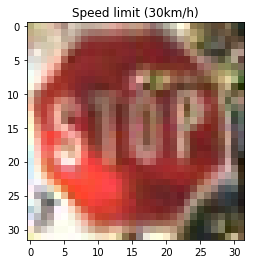

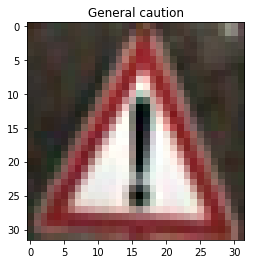

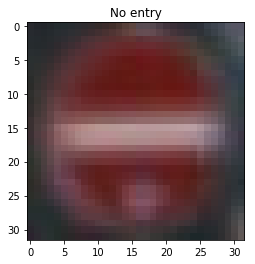

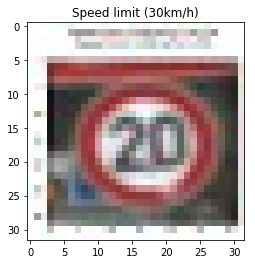

In [25]:
'''
CELL 9
'''

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Read Labels from signnames.csv
csv_data = np.genfromtxt('signnames.csv', delimiter=',', names=True, dtype=None)
sign_names = [t[1].decode('utf-8') for t in csv_data]

#Make Predictions
extra_signs_norm = normalize(extra_signs_x)
predictions = tf.argmax(fc,1)
predicted_classes = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('chaiNet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    predicted_classes = sess.run(predictions, feed_dict={x: extra_signs_norm, keep_prob: 1.0})

#Display Prediction    
for class_label,image_path in zip(predicted_classes, files):
    image = mpimg.imread(dir + image_path)
    plt.title(sign_names[class_label])
    plt.imshow(image)
    plt.show()
    

### Analyze Performance

In [26]:
'''
CELL 10
'''

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

'''
Based on the sample of 6 images, accuracy was 6/6. But I would be cautious about the results 
because of the small sample size. A much larger data set is needed to improve the confidence level.
'''

'\nBased on the sample of 6 images, accuracy was 6/6. But I would be cautious about the results \nbecause of the small sample size. A much larger data set is needed to improve the confidence level.\n'

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

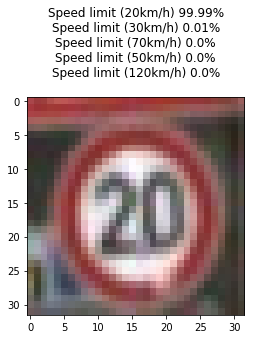

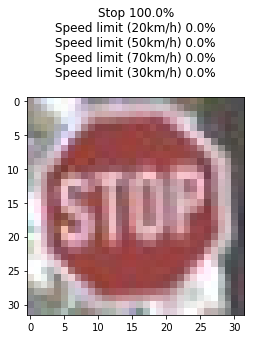

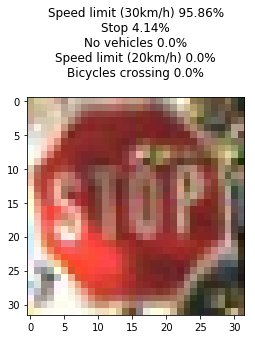

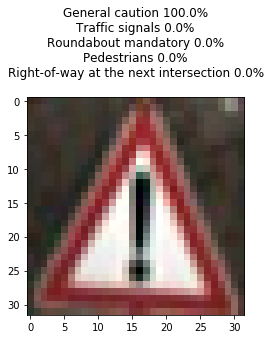

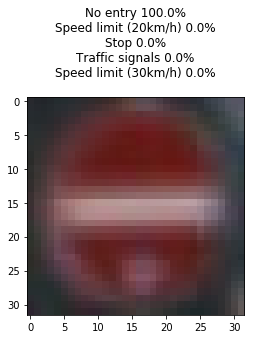

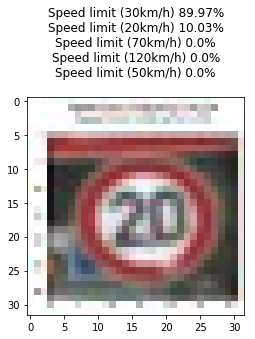

In [28]:
'''
CELL 11
'''

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#Calculate Probabilities
probs = tf.nn.softmax(fc)
top_k_op = tf.nn.top_k(probs, k=5)
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('chaiNet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    top_k = sess.run(top_k_op, feed_dict={x: extra_signs_norm, keep_prob: 1.0})
    prob_values, class_labels = top_k[0], top_k[1]

#Display Probabilities    
for i in np.arange(len(class_labels)):
    image_path = files[i]
    image = mpimg.imread(dir + image_path)
    title=''
    for certainty, label in zip(prob_values[i], class_labels[i]):
        title += sign_names[label] + ' ' + str(round(certainty* 100., 2)) + '%\n'
    plt.title(title)
    plt.imshow(image)
    plt.show()


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [ ]:
###Writeup / README

A more complete version of the writeup is the writeup_template.md file attached

In [ ]:
####1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and code is included in this directory

In [ ]:
###Data Set Summary & Exploration

####1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

The code for this step is contained in code cell 2 of the IPython notebook.  

I used the matplotlib and pandas library to calculate summary statistics of the traffic
signs data set:

* The size of training set is ?
* The size of test set is ?
* The shape of a traffic sign image is ?
* The number of unique classes/labels in the data set is ?

The output is as follows:

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


####2. Include an exploratory visualization of the dataset and identify where the code is in your code file.

The code for this step is contained in code cell 3 & 4 of the IPython notebook.  

Here is an exploratory visualization of the data set. First, showing a random selection of 10 images

![](./writeupData/image1.png)


These are 2 bar charts showing how the images are distributed ...

for the training set

![](./writeupData/image2.png)

for the testing set

![](./writeupData/image3.png)

In [ ]:
###Design and Test a Model Architecture

####1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

The code for this step is contained in code cell 5 of the IPython notebook.

As a first step, I decided NOT to convert the images to grayscale because I wanted to test the training network in color since it can accept a 3 color (rgb) 32x32x3 matrix

As a second step, I normalized the image data to reduce the range of values processed

####2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

The code for splitting the data into training and validation sets is contained in code cell 5 of the IPython notebook.  

I tried splitting the set into 1/3 validation and 2/3 training, which yielded better results for this dataset

After pre processing shape of training, validation and test dataset are as follows:
(26270, 32, 32, 3) (12939, 32, 32, 3) (12630, 32, 32, 3)
The 32,32,3 show the image data in rgb format hence 32x32x3.

####3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for my final model is located in cell 6 of the ipython notebook. 

My final model consisted of the following layers:

    **#Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.**
    # Activation 1.
    # Pooling. Input = 28x28x6. Output = 14x14x6.

    
    **# Layer 2: Convolutional. Output = 10x10x16**.
    # Activation 2
    # Pooling. Input = 10x10x16. Output = 5x5x16.


    # Flatten. Input = 5x5x16. Output = 400.


    **# Layer 3: Fully Connected. Input = 400. Output = 120.**
    # Activation 3 
   

    **# Layer 4: Fully Connected. Input = 120. Output = 84. **
    # Activation 4 
    

    **# Layer 5: Fully Connected. Input = 84. Output = 10.**

####4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The code for training the model is located in cell 7 of the ipython notebook. 

To train the model, I used the LEnet Architecture with mu = 0 and sigma = 0.1, with EPOCHS = 20, and BATCH_SIZE = 128

I initially tested it on MNIST numbers 0-9, which seems to work well, before trying it on traffic signs.

The reason for lesser EPOCHS and small batch size, was due to the fact that I did not have access to a GPU.

####5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the accuracy of the model is located in the ninth cell of the Ipython notebook.

My final model results were:
* validation set accuracy of Validation accuracy = 0.985
 
* test set accuracy of 0.909

LEnet is the basic solution for processing images 32x32, I believe that for small images, one should try it first.

I did not test with gray scale images due to timing and equipment constraints, however, since in real life situations, the color of traffics do matter. It's a good first test

The difference in the validation set and test set is significant and this is probably due to overfitting. To counter this, there are a few things to try:

1) dataset augmentation: Augment each label class by either skewing the data slightly between 5 or 15 degrees each way and saving the resulting images as new images within the label class. One can also apply different blurring filters to the images. The resulting new images then essentially "augments" the dataset.

2) shuffling the data set randomly and splitting the data set at different points or apply different percentage splits (eg 10/90,20/80 instead 0.332/0.67) 

In [ ]:
###Test a Model on New Images

####1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:


![](./extra-traffic-signs/1.jpg)

The first image might be difficult to classify because when blurred or skewed the numbers "20" could look like "30" or even "80".

![](./extra-traffic-signs/2.jpg)

The second image might be difficult to classify because the resolution may not be enough to capture the wording on the sign 

![](./extra-traffic-signs/3.jpg)
The third image might be difficult to classify because the shadow across the sign could affect the reading of the words. In addition, the shadow's boundary may appear as a a feature.

![](./extra-traffic-signs/4.jpg)
The fourth image might be difficult to classify because of the low lighting and dark background

![](./extra-traffic-signs/5.jpg)
The fifth image might be difficult to classify because of blurriness

![](./extra-traffic-signs/6.jpg) 
The sixth image might be difficult to classify because of the whitespace in the image which could be falsely predicted as a feature.

####2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

The code for making predictions on my final model is located in cell 9 of the Ipython notebook.

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 20 km/h       		| 20 km/h  										| 
| Stop      			| Stop 											|
| Stop                  | Stop											|
| General Caution		| General Caution								|
| No Entry	      		| No Entry						 				|
| 20 km/h				| 20 km/h     									|


The model was able to correctly guess 5 of the 6 traffic signs, which gives an accuracy of 83.33%. This compares favorably to the accuracy on the test set BUT I would be cautious of the results due to the small sample size. However, the 100% result is consistent with the test set accuracy which should yield an accuracy of >90%. 5/6 is close to 90% +- 1/6. Thus 5/6 seems consistent. 

####3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in cell 11 of the Ipython notebook. 

For the first 5 images, the model is relatively sure of it's accuracy (probability close to 1), however for the 6th image, there is whitespace surrounding the image. Thus the prediction was 89.97% but it still recorded inaccurately for this particular case. 

![](./writeupData/f6.png)

Again, skewness and whitespace could affect accuracy in image recognition.